In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import precision_score,recall_score,f1_score,make_scorer,classification_report,confusion_matrix,plot_confusion_matrix,auc,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("./Data_clean/min_max_fwrd_inter_scaled.csv")

In [3]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264238,0.296991,0.297727,0.350722,0.201674,0.322016,0.342258,0.277486,0.337105,0.248045
1,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,B32AC8CC6D5D805AC053557AB05F5343,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,EDFC78B07BA2908B3395C4EB2304665E,1,0.066774,0.129864,0.160949,0.076445,0.083122,0.123187,0.108911,0.084734,...,0.327193,0.235321,0.195026,0.140686,0.140456,0.154962,0.173152,0.250748,0.227032,0.200783
4,6BCFD78138BC72A9BA1BFB0B79382192,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,F1472871E1AFF49D4289564B6377D76C,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,A9A0FE83467A680FBFB0DBFC910DF227,0,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,D9A6ADA018FA46A55D5438370456AA45,0,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [4]:
X = df.iloc[:,2:]

In [5]:
X

,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.264238,0.296991,0.297727,0.350722,0.201674,0.322016,0.342258,0.277486,0.337105,0.248045
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333740,0.547089,0.543432,0.527583,0.653459,0.581835,0.565681,0.495276,0.432795,0.416336
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.242798,0.286581,0.327142,0.282600,0.371304,0.394049,0.340220,0.365049,0.274071,0.222138
3,0.066774,0.129864,0.160949,0.076445,0.083122,0.123187,0.108911,0.084734,0.081280,0.078747,...,0.327193,0.235321,0.195026,0.140686,0.140456,0.154962,0.173152,0.250748,0.227032,0.200783
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.147734,0.174809,0.172454,0.043555,0.024132,0.024720,0.112419,0.024720,0.022366,0.035903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.288360,0.273369,0.242504,0.265432,0.263668,0.249559,0.223986,0.299824,0.316578,0.223986
40252,0.164334,0.000000,0.000000,0.348144,0.368229,0.353621,0.186853,0.245892,0.345709,0.267194,...,0.233719,0.402921,0.189897,0.314060,0.220329,0.282410,0.225806,0.378576,0.368229,0.290323
40253,0.048013,0.096026,0.076159,0.081126,0.127483,0.114238,0.073675,0.057947,0.101821,0.069536,...,0.081954,0.050497,0.053808,0.045530,0.040563,0.042219,0.065397,0.054636,0.032285,0.053808
40254,0.349472,0.313470,0.398924,0.355680,0.347610,0.361680,0.369543,0.496379,0.255328,0.286365,...,0.323609,0.340989,0.269812,0.214980,0.248293,0.230706,0.252845,0.272295,0.275812,0.214980


In [6]:
y = df.iloc[:,1:2]

In [7]:
y

,FLAG
0,1
1,1
2,1
3,1
4,1
...,...
40251,0
40252,0
40253,0
40254,0


In [8]:
X = np.array(X.values)
y= np.array(y.values)

In [11]:
#oversampling of minority class (imbalanced learning)
over = SMOTE(sampling_strategy=0.2,random_state=0)
over_x_train,over_y_train = over.fit_resample(X,y)

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(over_x_train, over_y_train, test_size=0.2, random_state=0)

In [15]:
model = LogisticRegression(max_iter=2000)

In [16]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [17]:
y_pred = model.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      7312
           1       0.50      0.11      0.18      1491

    accuracy                           0.83      8803
   macro avg       0.67      0.54      0.54      8803
weighted avg       0.79      0.83      0.78      8803



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix logistic Regression@80
[[7156  156]
 [1333  158]]
Normalized confusion matrix
[[0.97866521 0.02133479]
 [0.89403085 0.10596915]]


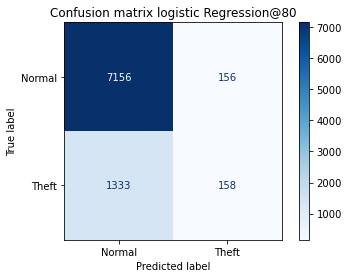

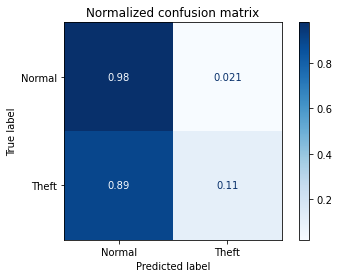

In [21]:
#plotting non-normalized confusion matrix

titles = [("Confusion matrix logistic Regression@80",None),
         ("Normalized confusion matrix","true")]

for title , normalized in titles:
    disp =plot_confusion_matrix(model,X_test,y_test,
                               display_labels=["Normal","Theft"],
                               cmap=plt.cm.Blues,
                               normalize=normalized)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
    
plt.show()

In [22]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,thresold = roc_curve(y_test,preds)
roc_auc = auc(fpr,tpr)

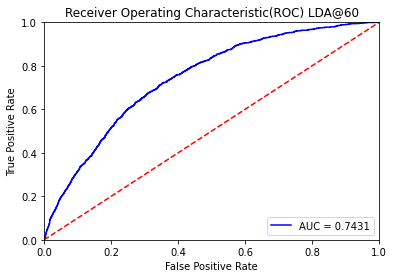

In [23]:
plt.title("Receiver Operating Characteristic(ROC) LDA@60")
plt.plot(fpr,tpr,"b",label="AUC = %0.4f" %roc_auc)
plt.legend(loc= "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [10]:
model_log = LogisticRegression()

In [11]:
model_log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
grid_log = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={"class_weight":[{0:1,1:v} for v in np.linspace(1,20,30)]},
    scoring={"precision": make_scorer(precision_score),
            "recall":make_scorer(recall_score),
            "f1_score":make_scorer(f1_score)
            },
    refit="f1_score",
    return_train_score=True,
    cv=10,
    verbose=1,
    n_jobs=-1
)

In [16]:
grid_log.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 1000,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=1000),
 'n_jobs': -1,
 'param_grid': {'class_weight': [{0: 1, 1: 1.0},
   {0: 1, 1: 1.6551724137931034},
   {0: 1, 1: 2.310344827586207},
   {0: 1, 1: 2.9655172413793105},
   {0: 1, 1: 3.6206896551724137},
   {0: 1, 1: 4.275862068965517},
   {0: 1, 1: 4.931034482758621},
   {0: 1, 1: 5.586206896551724},
   {0: 1, 1: 6.241379310344827},
   {0: 1, 1: 6.896551724137931},
   {0: 1, 1: 7.551724137931034},
   {0: 1, 1: 8.206896551724139},
   {0: 1, 1: 8.862068965517242},

In [17]:
grid_log.fit(X,y.values.ravel())

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='f1_score', return_train_score=True,
             scoring={'f1_score': make_scorer(f1_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)},
             verbose=1)

In [18]:
results = pd.DataFrame(grid_log.cv_results_)

In [19]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_f1_score,split3_train_f1_score,split4_train_f1_score,split5_train_f1_score,split6_train_f1_score,split7_train_f1_score,split8_train_f1_score,split9_train_f1_score,mean_train_f1_score,std_train_f1_score
0,70.757971,4.710005,0.103743,0.016042,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.454545,0.500000,0.461538,0.523810,...,0.099568,0.098673,0.096802,0.099626,0.101783,0.096886,0.097350,0.096774,0.098327,0.001940
1,76.186496,8.768319,0.088043,0.022515,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",0.349206,0.373134,0.358209,0.428571,...,0.173147,0.173306,0.165930,0.165798,0.176120,0.169395,0.172987,0.172673,0.171754,0.003663
2,78.304561,8.295029,0.095571,0.011577,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",0.272000,0.250000,0.283582,0.350746,...,0.236783,0.229195,0.231864,0.221005,0.234417,0.229964,0.233607,0.231766,0.231855,0.004449
3,82.676742,9.009746,0.097448,0.011857,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",0.280952,0.223176,0.269767,0.321429,...,0.282512,0.276119,0.282621,0.275606,0.287276,0.276508,0.283498,0.287599,0.281389,0.004700
4,86.429101,9.600301,0.092965,0.013459,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",0.249191,0.209302,0.241379,0.265861,...,0.312261,0.304794,0.310070,0.307615,0.316407,0.310793,0.315597,0.311385,0.311041,0.003425
5,84.802957,13.796082,0.105073,0.020059,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",0.227488,0.197701,0.213615,0.235955,...,0.330956,0.323372,0.328494,0.320242,0.324705,0.320550,0.326338,0.320787,0.324615,0.003732
6,88.267591,10.897559,0.091474,0.018600,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",0.217877,0.179533,0.194192,0.224299,...,0.330007,0.327758,0.334490,0.326341,0.327522,0.327459,0.330104,0.328500,0.329079,0.003132
7,90.775530,13.642960,0.098141,0.018836,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",0.210448,0.174815,0.187597,0.216794,...,0.328072,0.327412,0.331541,0.327128,0.325504,0.325891,0.327732,0.324091,0.327105,0.002462
8,94.853395,14.302164,0.095888,0.017743,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.197236,0.167910,0.178117,0.203728,...,0.326716,0.322593,0.327837,0.325235,0.325540,0.325870,0.324815,0.324164,0.324700,0.002241
9,97.519444,15.641667,0.093104,0.015573,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.189011,0.156926,0.167585,0.190867,...,0.323115,0.320535,0.322489,0.322194,0.324092,0.318153,0.319907,0.321888,0.321106,0.001844


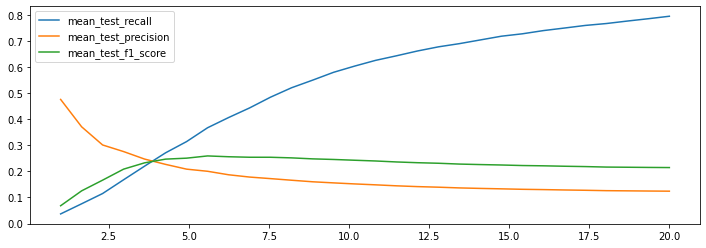

In [22]:
plt.figure(figsize= (12,4))
for score in ["mean_test_recall","mean_test_precision","mean_test_f1_score"]:
    plt.plot([_[1] for _ in results["param_class_weight"]],
            results[score],
            label = score)
plt.legend();

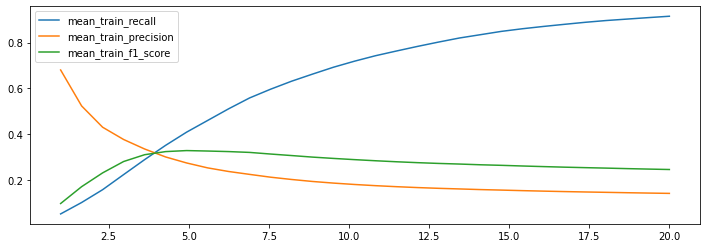

In [23]:
plt.figure(figsize= (12,4))
for score in ["mean_train_recall","mean_train_precision","mean_train_f1_score"]:
    plt.plot([_[1] for _ in results["param_class_weight"]],
            results[score.replace("test","train")],
            label = score)
plt.legend();